<a href="https://colab.research.google.com/github/bavyasri-0503/intern-projects/blob/main/SERVO_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**INTERNSHIP PROJECT-2**

**SERVO PREDICTION USING LINEAR REGRESSION**

**OBJECTIVE**:
Understanding and predicting the dataframe based on the Linear Regression model.
# **SERVO PREDICTION**:
It is also known as servo loop prediction or state predicition,is a technique used in robotics and control system to improvethe performance and stability of servo mechanisms.


**DATA SOURCE**:



> https://github.com/YBIFoundation/Dataset




**IMPORT LIBRARY**

In [1]:
import pandas as pd

In [2]:
import numpy as np

**IMPORT DATA**

In [4]:
sr=pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Servo%20Mechanism.csv')

**DESCRIBE DATA**:
Data Visualization and Data Preprocessing


# Get the first five rows of dataframe





In [5]:
sr.head()

,Motor,Screw,Pgain,Vgain,Class
0,E,E,5,4,4
1,B,D,6,5,11
2,D,D,4,3,6
3,B,A,3,2,48
4,D,B,6,5,6


# Get the information of dataframe

In [6]:
sr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Motor   167 non-null    object
 1   Screw   167 non-null    object
 2   Pgain   167 non-null    int64 
 3   Vgain   167 non-null    int64 
 4   Class   167 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.6+ KB


# Get the summary statistics

In [7]:
sr.describe()

,Pgain,Vgain,Class
count,167.000000,167.000000,167.000000
mean,4.155689,2.538922,21.173653
std,1.017770,1.369850,13.908038
min,3.000000,1.000000,1.000000
25%,3.000000,1.000000,10.500000
50%,4.000000,2.000000,18.000000
75%,5.000000,4.000000,33.500000
max,6.000000,5.000000,51.000000


# Get the columns names

In [8]:
sr.columns

Index(['Motor', 'Screw', 'Pgain', 'Vgain', 'Class'], dtype='object')

# Get the shape of dataframe

In [9]:
sr.shape

(167, 5)

**DATA VISUAIZATION AND DATA PREPROCESSING**

# get categories and countsof categories varaibles

In [10]:
sr[['Motor']].value_counts()

Motor
C        40
A        36
B        36
E        33
D        22
Name: count, dtype: int64

In [12]:
sr[[ 'Screw']].value_counts()

Screw
A        42
B        35
C        31
D        30
E        29
Name: count, dtype: int64

# Get encoding of categorical features

In [16]:
sr.replace({'Motor':{'A':0,'B':1,'C':2,'D':3,'E':4}},inplace=True)

In [17]:
sr.replace({'Screw':{'A':0,'B':1,'C':2,'D':3,'E':4}},inplace=True)

**DEFINE TARGET VARIABLE(Y) AND FEATURE VARIABLE(X)**

# Define y(dependent or label or target variable)and x(independent or feature or attribute variable)

In [18]:
y=sr['Class']

In [19]:
y.shape

(167,)

In [20]:
y

0       4
1      11
2       6
3      48
4       6
       ..
162    44
163    40
164    25
165    44
166    20
Name: Class, Length: 167, dtype: int64

In [21]:
x=sr[['Motor','Screw','Pgain','Vgain']]

or use drop function to define x

In [22]:
x=sr.drop('Class',axis=1)

In [23]:
x.shape

(167, 4)

In [24]:
x

,Motor,Screw,Pgain,Vgain
0,4,4,5,4
1,1,3,6,5
2,3,3,4,3
3,1,0,3,2
4,3,1,6,5
...,...,...,...,...
162,1,2,3,2
163,1,4,3,1
164,2,3,4,3
165,0,1,3,2


**TRAIN TEST SPLIT**

# Get Train Test Split

In [25]:
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.7,random_state=2529)

In [28]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((50, 4), (117, 4), (50,), (117,))

**MODELING**

#  Get Model Train

In [30]:
from sklearn.linear_model import LinearRegression

In [43]:
lr=LinearRegression()

In [44]:
lr.fit(x_train, y_train)

LinearRegression()

**MODEL PREDICTION**

# Get Model Prediction

In [45]:
y_pred=lr.predict(x_test)

In [47]:
y_pred.shape

(117,)

In [48]:
y_pred

array([ 24.89015109,  28.08391972,  17.55257369,  19.57157488,
        37.1210723 ,  23.02101376,  11.31490029,  17.33873833,
        38.79851087,  39.51501737,  12.99233887,  22.61547965,
        15.87513511,  11.6564629 ,  19.26060249,  16.93320422,
        -4.46259683,  29.92246682,  31.59990539,  -3.35180088,
        30.72229038,  30.8833989 ,  32.80526306,  27.12298763,
        14.53925915,   6.09088581,  27.33682299,  14.70036767,
        21.65454756,   3.45251515,  29.01426157,  22.77658817,
        34.23827605,  28.80042621,   8.30158575,   3.20808956,
        17.8941363 ,  29.76135829,  12.61739498,  36.16014022,
        27.52852175,  19.01617691,   7.34065367,   5.66321509,
        30.1668924 ,  28.24502824,  32.56083747,   4.16902164,
        20.69361548,  18.05524482,  24.45402675,   7.58507925,
        22.58488942,  33.11623545,  15.25576564,   0.5697189 ,
        36.87664671,   0.81414449,  16.21669772,  -1.82422617,
        22.06008168,  30.47786479,  23.52368489,  24.48

**MODEL EVALUATION**

#  Get Model Evaluation

In [49]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [50]:
mean_squared_error(y_test,y_pred)

73.57022323365531

In [51]:
mean_absolute_error(y_test,y_pred)

7.158141394974153

In [52]:
r2_score(y_test,y_pred)

0.6372902527668625

**PREDICTION**

# Get Visualization of actual vs predict results

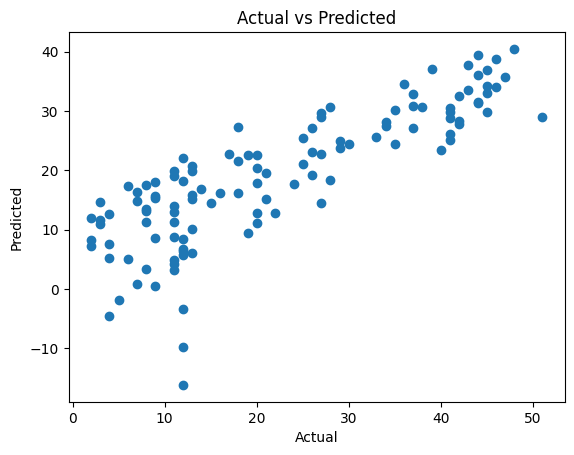

In [53]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

# Get Future Predictions
**Lets select a random sample from exisiting dataset as new value**
Steps to follow


1.   Extracta random row using sample function

1.  Separate X and Y
2.   Standardize X


2.  Predict



In [54]:
x_new=sr.sample(1)

In [55]:
x_new

,Motor,Screw,Pgain,Vgain,Class
10,1,4,6,5,9


In [56]:
x_new.shape

(1, 5)

In [58]:
x_new=x_new.drop('Class',axis=1)

In [59]:
x_new

,Motor,Screw,Pgain,Vgain
10,1,4,6,5


In [60]:
x_new.shape

(1, 4)

In [61]:
y_pred_new=lr.predict(x_new)

In [62]:
y_pred_new

array([0.5697189])

**EXPLAINATION**:
Linear Regression, is a statistical method that can be used for servo prediction. It is a technique that models the relationship between a dependent variable (the variable you want to predict, in this case, the servo position or output) and one or more independent variables (the input features that influence the servo output).







To use linear regression for servo prediction, you would typically follow these steps:

1. Collect a dataset of servo input and output values, including the relevant features (desired position, velocity, acceleration, etc.) and the corresponding servo output.

2. Split the dataset into training and testing sets.

3. Train a linear regression model on the training set, which involves estimating the coefficients (β0, β1, β2, ..., βn) that best fit the data.

4. Evaluate the trained model's performance on the testing set by comparing the predicted servo outputs with the actual outputs.

5. If the model performs well, you can use it to make predictions for new input data by plugging in the desired input values and computing the predicted servo output using the learned coefficients.

It's important to note that linear regression assumes a linear relationship between the input features and the output variable. If the relationship is non-linear, you may need to explore other regression techniques, such as polynomial regression or non-linear regression methods.

Additionally, linear regression can be sensitive to outliers and may not perform well if the assumptions of linearity, normality, and homoscedasticity (constant variance) are violated. In such cases, you may need to preprocess the data or consider alternative modeling techniques.